In [389]:
from __future__ import print_function
import time,sys,statistics,csv,math
import numpy as np

## The possible attributes in the data with the prediction at index 0. Smaller names for brevity.
attributes = ["rich","age","wc","fnlwgt","edu","edun","mar","occ","rel","race","sex","capg","canpl","hpw","nc"]

## Get the encoding of the csv file by replacing each categorical attribute value by its index.
wc_l = "Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked".split(", ")
edu_l = "Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool".split(", ")
mar_l = "Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse".split(", ")
occ_l = "Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces".split(", ")
rel_l = "Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried".split(", ")
race_l = "White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black".split(", ")
sex_l = "Female, Male".split(", ")
nc_l = "United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands".split(", ")
encode = {
    "rich"   : {"0":0,"1":1},
    "wc"     : {wc_l[i]:i for i in range(len(wc_l))},
    "edu"    : {edu_l[i]:i for i in range(len(edu_l))},
    "mar"    : {mar_l[i]:i for i in range(len(mar_l))},
    "occ"    : {occ_l[i]:i for i in range(len(occ_l))},
    "rel"    : {rel_l[i]:i for i in range(len(rel_l))},
    "race"   : {race_l[i]:i for i in range(len(race_l))},
    "sex"    : {sex_l[i]:i for i in range(len(sex_l))},
    "nc"     : {nc_l[i]:i for i in range(len(nc_l))},
    }

def medians(file):
    """
    Given a csv file, find the medians of the categorical attributes for the whole data.
    params(1):
        file : string : the name of the file
    outputs(6):
        median values for the categorical columns
    """
    fin = open(file,"r")
    reader = csv.reader(fin)
    age, fnlwgt, edun, capg, capl, hpw = ([] for i in range(6))
    total = 0
    for row in reader:
        total+=1
        if(total==1):
            continue
        l = [x.lstrip().rstrip() for x in row]
        age.append(int(l[0]));
        fnlwgt.append(int(l[2]));
        edun.append(int(l[4]));
        capg.append(int(l[10]));
        capl.append(int(l[11]));
        hpw.append(int(l[12]));
    fin.close()
    return(statistics.median(age),statistics.median(fnlwgt),statistics.median(edun),statistics.median(capg),statistics.median(capl),statistics.median(hpw))

def preprocess(file,median):
    """
    Given a file, read its data by encoding categorical attributes and binarising continuos attributes based on median.
    params(1):
        file : string : the name of the file
    outputs(6):
        2D numpy array with the data
    """
    # Calculate the medians
    agem,fnlwgtm,edunm,capgm,caplm,hpwm = medians(file)
    fin = open(file,"r")
    reader = csv.reader(fin)
    data = []
    total = 0
    for row in reader:
        total+=1
        # Skip line 0 in the file
        if(total==1):
            continue
        l = [x.lstrip().rstrip() for x in row]
        t = [0 for i in range(15)]

        # Encode the categorical attributes
        t[0] = encode["rich"][l[-1]]; t[2] = encode["wc"][l[1]]; t[4] = encode["edu"][l[3]]
        t[6] = encode["mar"][l[5]]; t[7] = encode["occ"][l[6]]; t[8] = encode["rel"][l[7]]
        t[9] = encode["race"][l[8]]; t[10] = encode["sex"][l[9]]; t[14] = encode["nc"][l[13]]

        # Binarize the numerical attributes based on median.
        # Modify this section to read the file in part c where you split the continuos attributes baed on dynamic median values.
        if median:
            t[1] = float(l[0])>=agem; t[3] = float(l[2])>=fnlwgtm; t[5] = float(l[4])>=edunm;
            t[11] = float(l[10])>=capgm; t[12] = float(l[11])>=caplm; t[13] = float(l[12])>=hpwm;
        else:
            t[1] = float(l[0]); t[3] = float(l[2]); t[5] = float(l[4]);
            t[11] = float(l[10]); t[12] = float(l[11]); t[13] = float(l[12]);
        # Convert some of the booleans to ints
        data.append([int(x) for x in t])

    return np.array(data,dtype=np.int64)

In [390]:
## Read the data
train_data = preprocess("../dataset/train.csv",1)
valid_data = preprocess("../dataset/valid.csv",1)
test_data = preprocess("../dataset/test.csv",1)
train_data_raw = preprocess("../dataset/train.csv",0)
valid_data_raw = preprocess("../dataset/valid.csv",0)
test_data_raw = preprocess("../dataset/test.csv",0)

print("The sizes are ","Train:",len(train_data),", Validation:",len(valid_data),", Test:",len(test_data))

The sizes are  Train: 27000 , Validation: 3000 , Test: 7000


In [391]:
cont_attribute = [1,3,5,11,12,13]

In [392]:
class Tree:
    def __init__(self):
        attr = None
        label =None
        child_list = None
        index_in_list = None
        thresh = None
        is_leaf =None

In [393]:
def i_gain(pos_val,neg_val):
    total = pos_val + neg_val
    i_gain_val =  -1 * ((1.0 * pos_val)/total) * math.log((1.0 * pos_val)/total) - ((1.0 * neg_val)/total)*math.log((1.0*neg_val)/total)
    return i_gain_val

In [394]:
def median_data(pos_list,neg_list,attribute):
    attr_data = []
    for i in range(len(pos_list)):
        ind = pos_list[i]
        attr_value = train_data_raw[ind][attribute]
        attr_data.append(attr_value)
    for i in range(len(neg_list)):
        ind = neg_list[i]
        attr_value = train_data_raw[ind][attribute]
        attr_data.append(attr_value)
    median_value = statistics.median(attr_data)
    return median_value
    

In [395]:
def information_gain(pos_list,neg_list,attribute,raw):
    attr_map = {}
    total_examples = len(pos_list) + len(neg_list)
    if attribute in cont_attribute:
        median_value = median_data(pos_list,neg_list,attribute)
    for i in range(len(pos_list)):
        ind = pos_list[i]
        if (raw)  and (attribute in cont_attribute):
            attr_value = train_data_raw[ind][attribute] >= median_value
        else:
            attr_value = train_data[ind][attribute]
        if attr_value in attr_map:
            attr_map[attr_value][0] +=1
        else:
            attr_map[attr_value] = [1,0]
    for i in range(len(neg_list)):
        ind = neg_list[i]
        if (raw)  and (attribute in cont_attribute):
            attr_value = train_data_raw[ind][attribute] >= median_value
        else:
            attr_value = train_data[ind][attribute]
        if attr_value in attr_map:
            attr_map[attr_value][1] +=1
        else:
            attr_map[attr_value] = [0,1]
    i_gain_map = {}
    for key in attr_map.keys():
        pos_val = attr_map[key][0]
        neg_val = attr_map[key][1]
        if pos_val==0 or neg_val==0:
            i_gain_map[key] = 0
        else:
            i_gain_map[key] = i_gain(pos_val,neg_val)
    final_i_gain = 0.0
    for key in attr_map.keys():
        val_total = attr_map[key][0] + attr_map[key][1]
        final_i_gain += ((val_total/(1.0 * total_examples)) * i_gain_map[key])
    return final_i_gain

In [396]:
def best_attr(pos_list,neg_list,raw):
    minn = float("inf")
    ind = -1
    for i in range(14):
        inf_i = information_gain(pos_list,neg_list,i+1,raw)
#         print (i,inf_i)
        if inf_i < minn:
            ind = i+1
            minn = inf_i
    return ind

In [397]:
def make_tree(pos_list,neg_list,raw):
    global global_node_list
    if len(pos_list)==0:
        leaf_node = Tree()
        leaf_node.label = 0
        leaf_node.is_leaf = 1
        return leaf_node
    if len(neg_list)==0:
        leaf_node = Tree()
        leaf_node.label = 1
        leaf_node.is_leaf = 1
        return leaf_node
    pos_ex = len(pos_list)
    neg_ex = len(neg_list)
    curr_i_gain = i_gain(pos_ex,neg_ex)
    best_attribute = best_attr(pos_list,neg_list,raw)
    new_best_gain = information_gain(pos_list,neg_list,best_attribute,raw)
    new_node = Tree()
    if pos_ex > neg_ex :
        new_node.label = 1
    else:
        new_node.label = 0
    if curr_i_gain == new_best_gain:
        new_node.is_leaf = 1
        return new_node
    if raw:
        new_node.index_in_list = len(global_node_list_raw)
        global_node_list_raw.append(new_node)
    else:
        new_node.index_in_list = len(global_node_list)
        global_node_list.append(new_node)
    attr_map = {}
    new_node.attr = best_attribute
    if raw and (best_attribute in cont_attribute):
        median_value = median_data(pos_list,neg_list,best_attribute)
        new_node.thresh = median_value
    new_node.child_list = {}
    new_node.is_leaf=0
    for i in range(len(pos_list)):
        ind = pos_list[i]
        if (raw)  and (best_attribute in cont_attribute):
            attr_value = train_data_raw[ind][best_attribute] >= median_value
        else:
            attr_value = train_data[ind][best_attribute]
        if attr_value in attr_map:
            attr_map[attr_value][0].append(ind)
        else:
            attr_map[attr_value] = [[ind],[]]
    for i in range(len(neg_list)):
        ind = neg_list[i]
        if (raw)  and (best_attribute in cont_attribute):
            attr_value = train_data_raw[ind][best_attribute] >= median_value
        else:
            attr_value = train_data[ind][best_attribute]
        if attr_value in attr_map:
            attr_map[attr_value][1].append(ind)
        else:
            attr_map[attr_value] = [[],[ind]]
#     print (best_attribute)
#     for key in attr_map.keys():
#         print (key,len(attr_map[key][0]),len(attr_map[key][1]))
#     print ()
    for key in attr_map.keys():
        new_node.child_list[key] = (make_tree(attr_map[key][0],attr_map[key][1],raw))
    return new_node
    

In [398]:
base_pos = []
base_neg = []
global_node_list = []
global_node_list_raw = []
for i in range(len(train_data)):
    if train_data[i][0] == 1:
        base_pos.append(i)
    else:
        base_neg.append(i)
tree_root = make_tree(base_pos,base_neg,0)
tree_root_raw = make_tree(base_pos,base_neg,1)

In [399]:
print (len(global_node_list),len(global_node_list_raw))

2853 6590


In [400]:
import Queue
def get_bfs_list(input_node_list):
    bfs_q = Queue.Queue()
    bfs_list = []
    bfs_q.put(0)
    while not bfs_q.empty():
        ind = bfs_q.get()
        curr_node = input_node_list[ind]
        bfs_list.append(ind)
        for key in curr_node.child_list.keys():
            if not curr_node.child_list[key].is_leaf == 1:
                bfs_q.put(curr_node.child_list[key].index_in_list)
    return bfs_list
bfs_list = get_bfs_list(global_node_list)
bfs_list_raw = get_bfs_list(global_node_list_raw)

In [401]:
def accuracy_recur(pos_list,neg_list,node,benef_list,raw):
    if node.is_leaf == 1:
        return
    own_label = node.label
#     print (node.index_in_list)
    without_node = (1-own_label)*len(pos_list) + (own_label) * len(neg_list)
    divide_on = node.attr
    attr_map = {}
    with_node = 0
    for i in range(len(pos_list)):
        if raw and (divide_on in cont_attribute):
            attr_val = pos_list[i][divide_on] >= node.thresh
        else:
            attr_val = pos_list[i][divide_on]
        if attr_val in attr_map:
            attr_map[attr_val][0].append(pos_list[i])
        else:
            attr_map[attr_val] = [[pos_list[i]],[]]
    for i in range(len(neg_list)):
        if raw and (divide_on in cont_attribute):
            attr_val =  neg_list[i][divide_on] >= node.thresh
        else:
            attr_val =  neg_list[i][divide_on]
        if attr_val in attr_map:
            attr_map[attr_val][1].append(neg_list[i])
        else:
            attr_map[attr_val] = [[],[neg_list[i]]]
    for key in attr_map.keys():
        if key in node.child_list:
            child_label = node.child_list[key].label
            with_node += ((child_label)*len(attr_map[key][1]) + (1-child_label)*len(attr_map[key][0]))       
            accuracy_recur(attr_map[key][0],attr_map[key][1],node.child_list[key],benef_list,raw)
        else:
            own_label = node.label
            with_node += ((own_label)*len(attr_map[key][1]) + (1-own_label)*len(attr_map[key][0])) 
    benef_list[node.index_in_list] = (without_node) - with_node

In [402]:
def mis_accuracy(data,raw):
    if raw:
        num_nodes = len(global_node_list_raw)
    else:
        num_nodes = len(global_node_list)
    benef_list = []
    for i in range(num_nodes):
        benef_list.append(0)
    pos_list = []
    neg_list = []
    for i in range(len(data)):
        if data[i][0] == 1:
            pos_list.append(data[i])
        else:
            neg_list.append(data[i])
    if raw:
        accuracy_recur(pos_list,neg_list,tree_root_raw,benef_list,raw)
    else:
        accuracy_recur(pos_list,neg_list,tree_root,benef_list,raw)
    final_list = []
    own_label = tree_root.label
    curr_missclassified = (1-own_label)*len(pos_list) + (own_label) * len(neg_list)
    final_list.append(curr_missclassified)
    if raw:
        lis = bfs_list_raw
    else:
        lis = bfs_list
    for i in range(len(lis)):
        ind = lis[i]
        change = benef_list[ind]
        final_list.append(curr_missclassified-change)
        curr_missclassified -= change
    return final_list

In [403]:
def accuracy(data,raw):
    miss = mis_accuracy(data,raw)
    accur = []
    for i in range(len(miss)):
        accur.append((len(data) - miss[i])/(1.0 * len(data)))
    return accur

In [404]:
train_accur = accuracy(train_data,0)
valid_accur = accuracy(valid_data,0)
test_accur = accuracy(test_data,0)

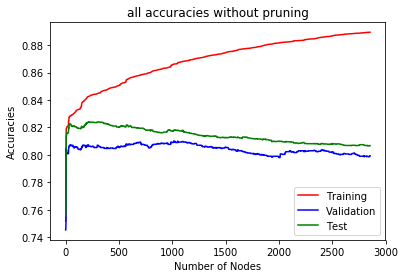

In [405]:
import matplotlib.pyplot as plt
plt.plot(train_accur,'r',label="Training")
plt.plot(valid_accur,'b',label="Validation")
plt.plot(test_accur,'g',label="Test")
plt.legend()
plt.title('all accuracies without pruning')
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracies")
plt.savefig("../output/accuracy_basic.jpeg")

In [406]:
train_accur_raw = accuracy(train_data_raw,1)
valid_accur_raw = accuracy(valid_data_raw,1)
test_accur_raw = accuracy(test_data_raw,1)


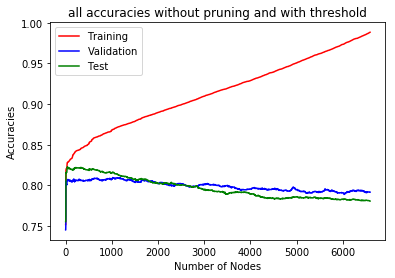

In [407]:
import matplotlib.pyplot as plt
plt.plot(train_accur_raw,'r',label="Training")
plt.plot(valid_accur_raw,'b',label="Validation")
plt.plot(test_accur_raw,'g',label="Test")
plt.legend()
plt.title('all accuracies without pruning and with threshold')
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracies")
plt.savefig("../output/accuracy_basic_raw.jpeg")

In [408]:
def zero_subtree(node,benef_list):
    benef_list[node.index_in_list] = 0
    for key in node.child_list.keys():
        if node.child_list[key].is_leaf == 0:
            zero_subtree(node.child_list[key],benef_list)

In [409]:
def prune_tree(data,raw):
    if raw:
        num_nodes = len(global_node_list_raw)
    else:
        num_nodes = len(global_node_list)
    benef_list = []
    for i in range(num_nodes):
        benef_list.append(0)
    pos_list = []
    neg_list = []
    for i in range(len(data)):
        if data[i][0] == 1:
            pos_list.append(data[i])
        else:
            neg_list.append(data[i])
    if raw:
        accuracy_recur(pos_list,neg_list,tree_root_raw,benef_list,raw)
    else:
        accuracy_recur(pos_list,neg_list,tree_root,benef_list,raw)
    while True:
        minind = -1
        minn = 0
        for i in range(len(benef_list)):
            if benef_list[i] < minn :
                minind = i
                minn = benef_list[i]
        if minind == -1:
            break
        if raw:
            node = global_node_list_raw[minind]
        else:
            node = global_node_list[minind]
        zero_subtree(node,benef_list)
        node.is_leaf = 1
        node.attr = None
        node.child_list = None
        

In [410]:
prune_tree(valid_data,0)

In [411]:
train_accur_prune = accuracy(train_data,0)
valid_accur_prune = accuracy(valid_data,0)
test_accur_prune = accuracy(test_data,0)

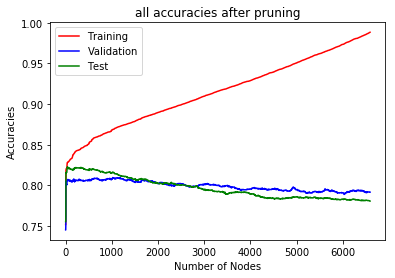

In [412]:
import matplotlib.pyplot as plt
plt.plot(train_accur_raw,'r',label="Training")
plt.plot(valid_accur_raw,'b',label="Validation")
plt.plot(test_accur_raw,'g',label="Test")
plt.legend()
plt.title('all accuracies after pruning')
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracies")
plt.savefig("../output/accuracy_basic_prune.jpeg")